In [66]:
from bs4 import BeautifulSoup as bs
import requests
url = bs("https://www.merolagani.com/StockQuote.aspx",'html.parser')  #   https://www.merolagani.com/StockQuote.aspx
soup = requests.get(url)
soup

C:\Users\pawan\AppData\Local\Temp\ipykernel_20852\1649446164.py:3: MarkupResemblesLocatorWarning:

The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.



<Response [200]>

In [67]:
data = soup.text
data = bs(data,"lxml")
data = data.table
data = data.find_all('tr')

data1= []
for i in data:
    y = i.text.split('\n')[3:]
    data1.append(y)
    
for sublist in data1:
    for i in range(len(sublist)):
        if i < len(sublist) and sublist[i] == '':
            del sublist[i]

data1

[['Symbol', 'LTP', '% Change', 'High', 'Low', 'Open', 'Qty.', 'Turnover'],
 ['ACLBSL',
  '756.70',
  '-1.59',
  '770.00',
  '756.00',
  '768.00',
  '1,107',
  '843,058.50'],
 ['ADBL',
  '229.40',
  '-1.55',
  '235.00',
  '229.00',
  '234.00',
  '20,603',
  '4,769,306.50'],
 ['ADBLD83',
  '1,101.00',
  '1.94',
  '1,101.00',
  '1,085.00',
  '1,085.00',
  '1,150',
  '1,263,419.90'],
 ['AHL',
  '436.00',
  '-3.11',
  '458.00',
  '436.00',
  '450.00',
  '11,391',
  '5,001,583.00'],
 ['AHPC',
  '166.50',
  '0',
  '170.00',
  '163.30',
  '169.00',
  '32,967',
  '5,469,305.50'],
 ['AKJCL',
  '211.50',
  '-0.24',
  '215.00',
  '209.00',
  '214.80',
  '12,662',
  '2,678,959.20'],
 ['AKPL',
  '167.00',
  '0.06',
  '170.00',
  '167.00',
  '169.40',
  '45,948',
  '7,718,543.90'],
 ['ALBSL',
  '717.90',
  '0.81',
  '717.90',
  '703.00',
  '712.00',
  '5,023',
  '3,554,946.20'],
 ['ALICL',
  '553.00',
  '0',
  '555.60',
  '545.80',
  '550.00',
  '8,398',
  '4,621,030.50'],
 ['ANLB',
  '1,933.00',
  '

In [68]:
import csv 
file = open('nepali_share.csv','w')
x = csv.writer(file)
x.writerows(data1)
file.close()

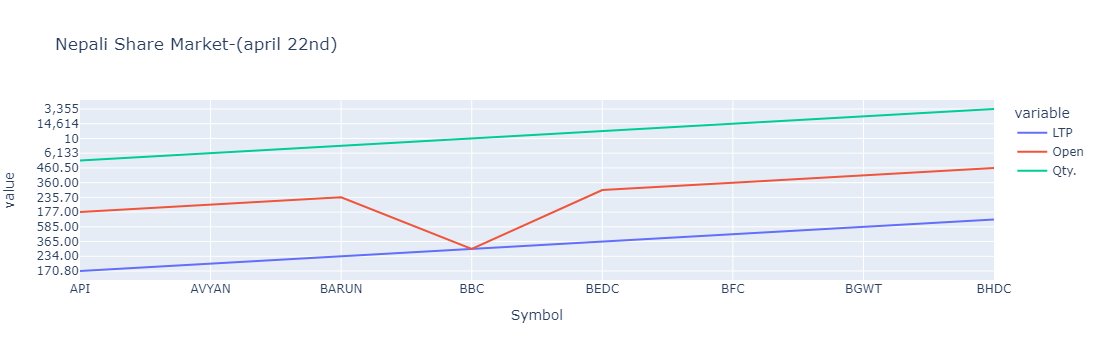

In [82]:
import pandas as pd
import plotly.express as px

df = pd.read_csv(r"C:\Users\pawan\A Data Science with Python Training\nepali_share.csv", encoding ="latin1")
df = df.iloc[10:18]

fig = px.line(df,x='Symbol',y = ['LTP','Open','Qty.'],title = 'Nepali Share Market-(april 22nd)')
fig.show()